# ANOMALY DETECTION WITH ISOLATION FOREST

In [12]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt

from sklearn.ensemble import IsolationForest

random_seed =  np.random.RandomState(12)


In [6]:
X_train = 0.5 + random_seed.randn(500,2)
X_train = np.r_[X_train + 3, X_train]
X_train = pd.DataFrame(X_train, columns=["x", "y"])


In [7]:
X_test = 0.5 * random_seed.randn(500, 2)
X_test = np.r_[X_test + 3, X_test]
X_test = pd.DataFrame(X_test, columns=["x", "y"])

In [8]:
X_outliers = random_seed.uniform(low=-5, high=5, size=(50, 2))
X_outliers = pd.DataFrame(X_outliers, columns=["x", "y"])

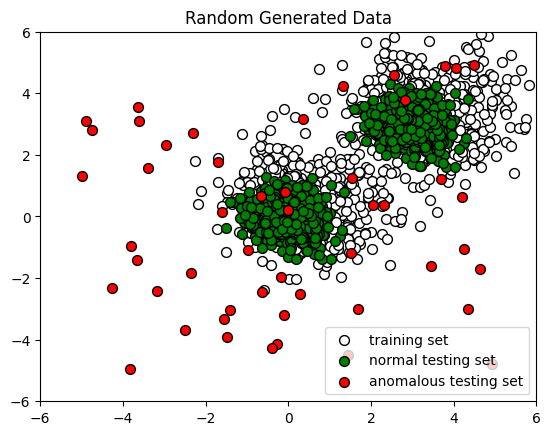

In [11]:
p1 = plt.scatter(X_train.x, X_train.y, c="white", s=50, edgecolor="black")
p2 = plt.scatter(X_test.x, X_test.y, c="green", s=50, edgecolor="black")
p3 = plt.scatter(X_outliers.x, X_outliers.y, c="red", s=50, edgecolor="black")
plt.xlim((-6, 6))
plt.ylim((-6, 6))
plt.legend(
    [p1, p2, p3],
    ["training set", "normal testing set", "anomalous testing set"],
    loc="lower right",
)

plt.title('Random Generated Data')
plt.show()

In [14]:
iso_Forest = IsolationForest()
iso_Forest.fit(X_train)

y_pred_train = iso_Forest.predict(X_train)
y_pred_test = iso_Forest.predict(X_test)
y_pred_outliers = iso_Forest.predict(X_outliers)

In [16]:
X_outliers = X_outliers.assign(pred=y_pred_outliers)
X_outliers.head()

,x,y,pred
0,3.452368,-1.622080,-1
1,-0.173574,-1.976163,-1
2,-0.071178,0.790206,1
3,4.214452,0.644312,-1
4,3.783759,4.892080,-1


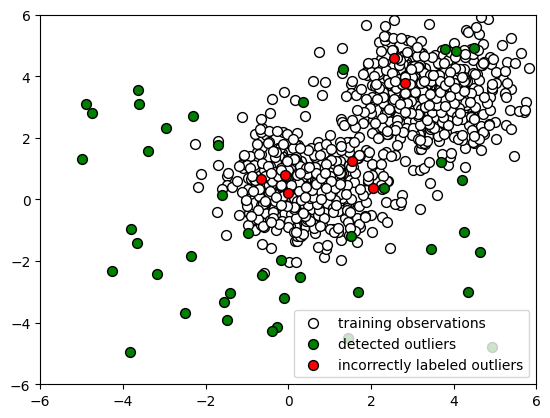

: 

In [18]:
p1 = plt.scatter(X_train.x, X_train.y, c="white", s=50, edgecolor="black")
p2 = plt.scatter(
    X_outliers.loc[X_outliers.pred == -1, ["x"]],
    X_outliers.loc[X_outliers.pred == -1, ["y"]],
    c="green",
    s=50,
    edgecolor="black",
)
p3 = plt.scatter(
    X_outliers.loc[X_outliers.pred == 1, ["x"]],
    X_outliers.loc[X_outliers.pred == 1, ["y"]],
    c="red",
    s=50,
    edgecolor="black",
)

plt.xlim((-6, 6))
plt.ylim((-6, 6))
plt.legend(
    [p1, p2, p3],
    ["training observations", "detected outliers", "incorrectly labeled outliers"],
    loc="lower right",
)

plt.show()